In [20]:
from PIL import Image
import os, numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, InputLayer

In [7]:
folder = './fifty_reso_data/train'
filelist=os.listdir(folder)
for fichier in filelist:
    if not(fichier.endswith(".png")):
        filelist.remove(fichier)
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
ims = [read(os.path.join(folder, filename)) for filename in filelist]
im_array = np.array(ims, dtype='uint8')
im_array = im_array / 255.0

In [8]:
X_train, X_test = train_test_split(im_array, test_size=0.1, random_state=42)

In [29]:
# input dimension = 784
input_dim =  im_array.shape[1:]
encoding_dim = 20
print(input_dim)

(50, 50, 3)


In [30]:
im_array.shape[1:]

(50, 50, 3)

In [31]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(InputLayer(input_dim))
autoencoder.add(Flatten())
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(7500, activation='sigmoid'))
autoencoder.add(Reshape(input_dim))
autoencoder.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 7500)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 80)                600080    
_________________________________________________________________
dense_48 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_49 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_50 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_51 (Dense)             (None, 80)                3280      
_________________________________________________________________
dense_52 (Dense)             (None, 7500)            

In [37]:
from keras.optimizers import RMSprop

In [38]:
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(loss='mean_squared_error',optimizer=RMSprop())
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=8,
                validation_data=(X_test, X_test))

Train on 998 samples, validate on 111 samples
Epoch 1/50
998/998 [==============================] - 1s 1ms/step - loss: 0.0108 - val_loss: 0.0132
Epoch 2/50
998/998 [==============================] - 1s 798us/step - loss: 0.0089 - val_loss: 0.0172
Epoch 3/50
998/998 [==============================] - 1s 804us/step - loss: 0.0090 - val_loss: 0.0131
Epoch 4/50
998/998 [==============================] - 1s 827us/step - loss: 0.0086 - val_loss: 0.0128
Epoch 5/50
998/998 [==============================] - 1s 819us/step - loss: 0.0084 - val_loss: 0.0083
Epoch 6/50
998/998 [==============================] - 1s 828us/step - loss: 0.0085 - val_loss: 0.0136
Epoch 7/50
998/998 [==============================] - 1s 789us/step - loss: 0.0086 - val_loss: 0.0093
Epoch 8/50
998/998 [==============================] - 1s 805us/step - loss: 0.0083 - val_loss: 0.0094
Epoch 9/50
998/998 [==============================] - 1s 813us/step - loss: 0.0082 - val_loss: 0.0086
Epoch 10/50
998/998 [=================

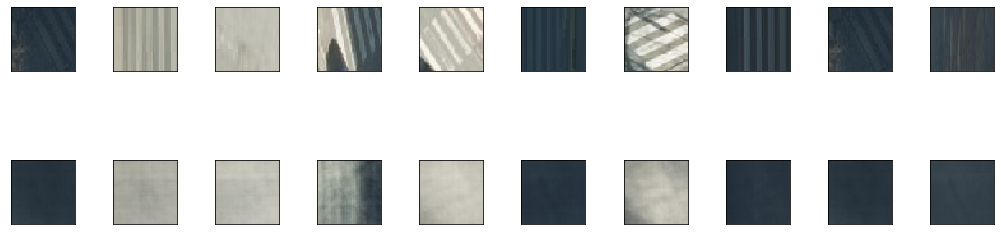

In [44]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(X_test.shape[0], size=num_images)

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(X_test[image_idx].reshape(50, 50,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(50, 50,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()